In [14]:
import pandas as pd

# First of all I load the dataset 
products = pd.read_csv("NikeProductDescriptions.csv")

# I check for the first few rows of the dataset 
print(products.head())



                          Title     Subtitle  \
0          Nike Air Force 1 '07  Men's Shoes   
1          Nike Air Max Dawn SE  Men's Shoes   
2  Nike SB Dunk Low Pro Premium  Skate Shoes   
3   Nike Air Force 1 Mid '07 LX  Men's Shoes   
4      Nike Air Force 1 Mid '07  Men's Shoes   

                                 Product Description  
0  It doesn't get more legendary than this. Desig...  
1  Find out what moves you with the Air Max Dawn....  
2  Pack your style—on your feet. Bringing a fresh...  
3  The celebrations just keep coming. Unbox the A...  
4  Got your fave colour yet? No worries, the Colo...  


In [15]:
# I filtered the categories and I made everything that contains shorts into "Shorts"
categories = ["Men's Shoes", "Men's T-Shirt", "Women's Shoes","Skate Shoes", "Older Kids' T-Shirt"]
filt = products[products['Subtitle'].isin(categories) | products['Subtitle'].str.contains("Shorts", case=False)]
filt.loc[filt['Subtitle'].str.contains("Shorts", case=False), 'Subtitle'] = "Shorts"
print(filt['Subtitle'].value_counts())
print(filt.head())


Subtitle
Shorts                 45
Women's Shoes          34
Men's Shoes            31
Skate Shoes            22
Men's T-Shirt          14
Older Kids' T-Shirt     9
Name: count, dtype: int64
                          Title     Subtitle  \
0          Nike Air Force 1 '07  Men's Shoes   
1          Nike Air Max Dawn SE  Men's Shoes   
2  Nike SB Dunk Low Pro Premium  Skate Shoes   
3   Nike Air Force 1 Mid '07 LX  Men's Shoes   
4      Nike Air Force 1 Mid '07  Men's Shoes   

                                 Product Description  
0  It doesn't get more legendary than this. Desig...  
1  Find out what moves you with the Air Max Dawn....  
2  Pack your style—on your feet. Bringing a fresh...  
3  The celebrations just keep coming. Unbox the A...  
4  Got your fave colour yet? No worries, the Colo...  


C:\Users\user\AppData\Local\Temp\ipykernel_14748\3081565864.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt.loc[filt['Subtitle'].str.contains("Shorts", case=False), 'Subtitle'] = "Shorts"


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
# Starting with the BOW model
desc = filt['Product Description'].values
bowVect = CountVectorizer(stop_words='english')
bowMatrix = bowVect.fit_transform(descriptions)
bowdf = pd.DataFrame(bowMatrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
print(bowdf.shape)
print(bowdf.head())


(155, 1381)
   07  10  100  10k  1990  1990s  1997  1s  1st  20  ...  wrong  wrote  years  \
0   1   0    0    0     0      0     0   0    0   0  ...      0      0      0   
1   0   0    0    0     0      0     0   0    0   0  ...      1      0      0   
2   0   0    0    0     0      0     0   0    0   0  ...      0      0      0   
3   0   0    0    0     0      0     0   0    0   0  ...      0      0      0   
4   0   0    0    0     0      0     0   0    0   0  ...      0      0      0   

   yellow  yoga  zen  zigzag  zip  zone  zoom  
0       0     0    0       0    0     0     0  
1       0     0    0       0    0     0     0  
2       0     0    0       0    0     0     0  
3       0     0    0       0    0     0     0  
4       0     0    0       0    0     0     0  

[5 rows x 1381 columns]


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Secondly the TF-IDF Model:
TFIDFvectorizer = TfidfVectorizer(stop_words='english')
TFIDFmatrix = TFIDFvectorizer.fit_transform(descriptions)
TFIDFdf = pd.DataFrame(TFIDFmatrix.toarray(), columns=TFIDFvectorizer.get_feature_names_out())
print(TFIDFdf.shape)
print(TFIDFdf.head())


(155, 1381)
         07   10  100  10k  1990  1990s  1997   1s  1st   20  ...     wrong  \
0  0.196535  0.0  0.0  0.0   0.0    0.0   0.0  0.0  0.0  0.0  ...  0.000000   
1  0.000000  0.0  0.0  0.0   0.0    0.0   0.0  0.0  0.0  0.0  ...  0.233372   
2  0.000000  0.0  0.0  0.0   0.0    0.0   0.0  0.0  0.0  0.0  ...  0.000000   
3  0.000000  0.0  0.0  0.0   0.0    0.0   0.0  0.0  0.0  0.0  ...  0.000000   
4  0.000000  0.0  0.0  0.0   0.0    0.0   0.0  0.0  0.0  0.0  ...  0.000000   

   wrote  years  yellow  yoga  zen  zigzag  zip  zone  zoom  
0    0.0    0.0     0.0   0.0  0.0     0.0  0.0   0.0   0.0  
1    0.0    0.0     0.0   0.0  0.0     0.0  0.0   0.0   0.0  
2    0.0    0.0     0.0   0.0  0.0     0.0  0.0   0.0   0.0  
3    0.0    0.0     0.0   0.0  0.0     0.0  0.0   0.0   0.0  
4    0.0    0.0     0.0   0.0  0.0     0.0  0.0   0.0   0.0  

[5 rows x 1381 columns]


In [21]:
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# First I am defining my cleaning function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def cleantext(txt):
    words = nltk.word_tokenize(txt.lower())
    words = [lemmatizer.lemmatize(i) for i in words if i.isalpha() and i not in stop_words]
    return words
tokenizedText = [cleantext(x) for x in descriptions]

# Now I am doing the Word2Vec
w2v = Word2Vec(sentences=tokenizedText, vector_size=100, window=5, min_count=1, sg=0)

# Average vectors per description
def getAverageVector(words):
    v = [model_w2v.wv[word] for word in words if word in model_w2v.wv]
    if len(v) == 0:
        return [0]*w2v.vector_size
    return list(sum(v) / len(v))
    
w2vVectors = [get_average_vector(words) for words in tokenizedText]
w2vdf = pd.DataFrame(w2vVectors)
print(w2vdf.shape)
print(w2vdf.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(155, 100)
         0         1         2         3         4         5         6   \
0 -0.002663  0.001029  0.001179  0.000816  0.000125 -0.001879  0.000498   
1 -0.000352  0.000517  0.000965  0.000015  0.000382 -0.002810 -0.000822   
2 -0.000794  0.002919 -0.001058 -0.000985 -0.000143 -0.003183 -0.000667   
3 -0.000032  0.002746  0.000330 -0.001095  0.000336  0.000204  0.002468   
4  0.000129  0.002486  0.000350  0.000396  0.001664 -0.001856  0.000732   

         7         8         9   ...        90        91        92        93  \
0  0.004903 -0.002470 -0.000297  ...  0.003266  0.001010 -0.001338 -0.001282   
1  0.005147 -0.000564 -0.001213  ...  0.001384 -0.000427 -0.000096 -0.001750   
2  0.003505 -0.000973 -0.000609  ...  0.003711 -0.000291  0.000648  0.000544   
3  0.002866 -0.002505 -0.000810  ...  0.000951  0.001240  0.000427  0.000571   
4  0.002202 -0.002427 -0.000267  ...  0.000839  0.001726 -0.000189  0.000511   

         94        95        96        97        98      

In [23]:
# Now i am doing Glove
import gensim.downloader as api
glove = api.load("glove-wiki-gigaword-100")
def getglovevector(words):
    vecs = [glove[y] for y in words if y in glove]
    if len(vecs) == 0:
        return [0] * 100
    return list(sum(vecs) / len(vecs))

gloveVecs = [getglovevector(words) for words in tokenizedText]
glovedf = pd.DataFrame(gloveVecs)
print(glovedf.shape)
print(glovedf.head())

(155, 100)
         0         1         2         3         4         5         6   \
0 -0.151982  0.186562  0.267523 -0.194093  0.117825  0.058439 -0.020367   
1 -0.021420  0.212555  0.112079 -0.193329 -0.103646 -0.043652  0.078828   
2 -0.150755  0.225351  0.152970 -0.275330  0.056227  0.139530 -0.058053   
3 -0.088622  0.190802  0.203152 -0.097604 -0.092130  0.363737  0.123471   
4 -0.135460  0.298258  0.167173 -0.304800  0.031982  0.072819 -0.135035   

         7         8         9   ...        90        91        92        93  \
0  0.098159 -0.236797  0.119431  ...  0.113437 -0.038740 -0.093713 -0.210947   
1  0.150495 -0.167968  0.075809  ... -0.027935  0.068789  0.044359 -0.093195   
2  0.018880 -0.007016  0.143012  ...  0.002283 -0.013972 -0.003504 -0.230235   
3  0.217511 -0.032584 -0.017809  ...  0.095423  0.031294  0.075921 -0.036970   
4  0.149900 -0.021026  0.100921  ... -0.015566 -0.134796 -0.059883 -0.198432   

         94        95        96        97        98      

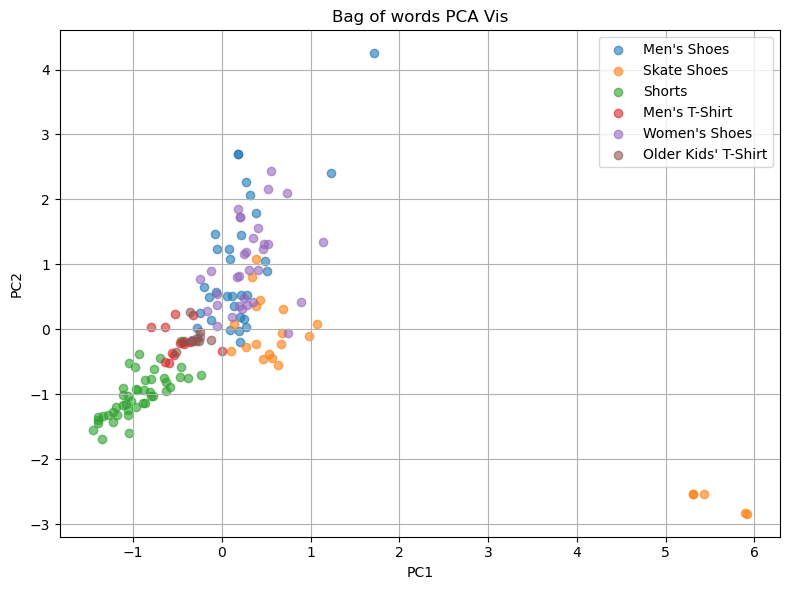

In [29]:
# Now I start doing PCA and the plot for BoW 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
bowpca = pca.fit_transform(bowdf)
bowpcadf = pd.DataFrame(bowpca, columns=['x', 'y'])
bowpcadf['category'] = filt['Subtitle'].values
plt.figure(figsize=(8,6))
for category in bowpcadf['category'].unique():
    p = bowpcadf[bowpcadf['category'] == category]
    plt.scatter(p['x'], p['y'], label=category, alpha=0.6)

plt.title("Bag of words PCA Vis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


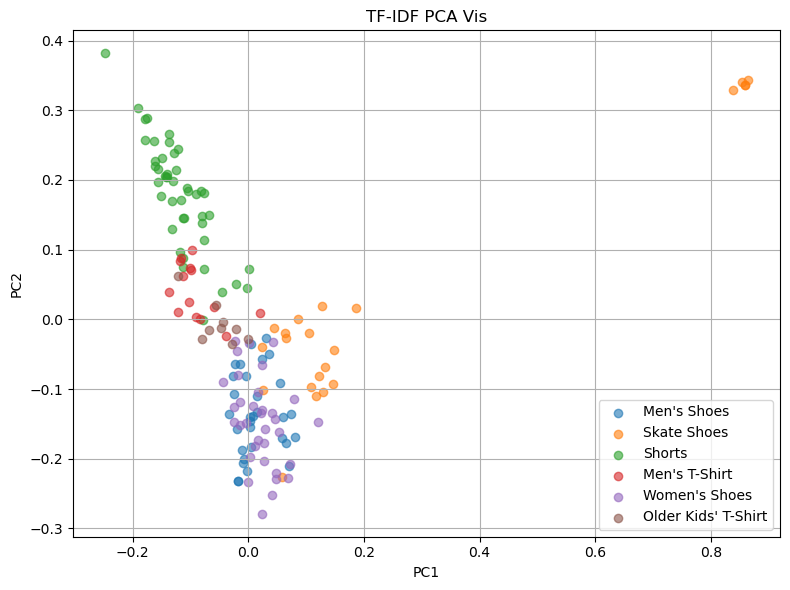

In [28]:
# Now I am doing PCA and the plot for TF-IDF
pca = PCA(n_components=2)
TFIDFpca = pca.fit_transform(TFIDFdf)
TFIDFpcadf = pd.DataFrame(TFIDFpca, columns=['x', 'y'])
TFIDFpcadf['category'] = filt['Subtitle'].values
plt.figure(figsize=(8,6))
for category in TFIDFpcadf['category'].unique():
    p1 = TFIDFpcadf[TFIDFpcadf['category'] == category]
    plt.scatter(p1['x'], p1['y'], label=category, alpha=0.6)

plt.title("TF-IDF PCA Vis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

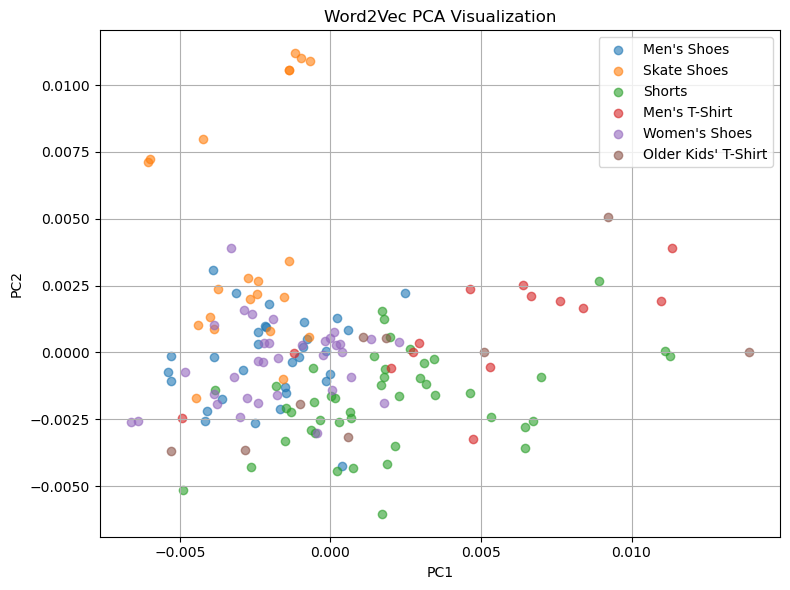

In [31]:
# Now I am doing pca and plot for Word2Vec
pca = PCA(n_components=2)
w2vpca = pca.fit_transform(w2vdf)
w2vpcadf = pd.DataFrame(w2vpca, columns=['x', 'y'])
w2vpcadf['category'] = filt['Subtitle'].values
plt.figure(figsize=(8,6))
for category in w2vpcadf['category'].unique():
    p2 = w2vpcadf[w2vpcadf['category'] == category]
    plt.scatter(p2['x'], p2['y'], label=category, alpha=0.6)
plt.title("Word2Vec PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

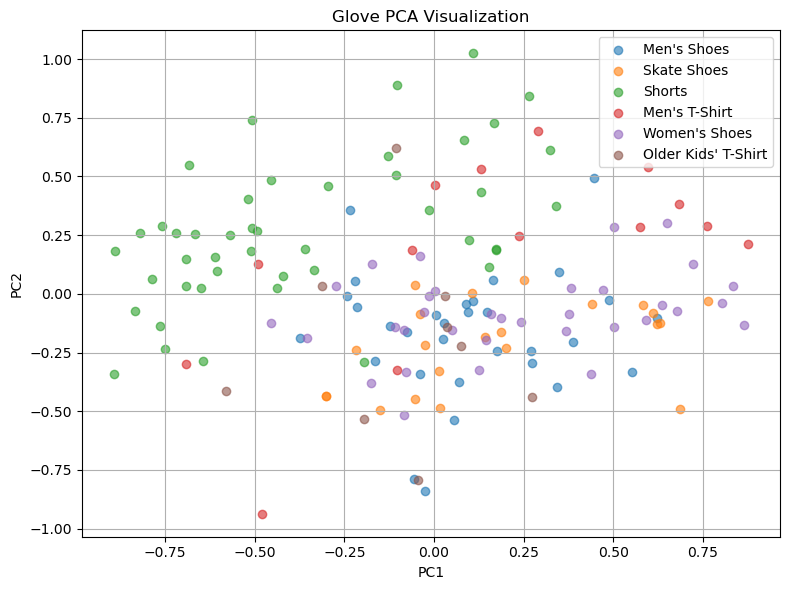

In [32]:
# Now finally I am doing pca and plot for Glove
pca = PCA(n_components=2)
glovepca = pca.fit_transform(glovedf)
glovepcadf = pd.DataFrame(glovepca, columns=['x', 'y'])
glovepcadf['category'] = filt['Subtitle'].values
plt.figure(figsize=(8,6))
for category in glovepcadf['category'].unique():
    p3 = glovepcadf[glove_2d_df['category'] == category]
    plt.scatter(p3['x'], p3['y'], label=category, alpha=0.6)

plt.title("Glove PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusion:

For the Nike product descriptions, I used four distinct embedding methods: BoW, TF-IDF, Word2Vec, and Glove. I then used PCA to display the results.

BoW: I generated Sparse vectors  using this technique, and i saw clusters that overlapped  in the PCA plot. Its efficacy for this dataset is limited by its lack of linguistic understandin

TF-IDF: By minimizing common terms and prioritizing important words, TF-IDF enhanced the representation. Especially for different product types like "Shorts" or "Skate Shoes," the clusters were easier to identify.

Word2Vec: It produced heavy, context-aware vectors after I trained it on the dataset that was given. But, some clusters were not as clear as I expected because of the corpus's small size.

Glove: The linguistic comprehension of descriptions was greatly enhanced when I used the pretrained Glove vectors, which were trained on sizable corpora. The PCA plot had the best product category separation, indicating that it successfully expressed meaning and cont

Glove's capacity to encode global co-occurrence information allowed it to provide the most distinct visual differentiation across product classes. In terms of semantic richness and clustering clarity, it fared better than the other models.
So i choose the Glove Model as the best embedding choiceext.g.